# Import Libraries and Data

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
# import tensorflow as tf
tf.test.is_gpu_available
# Set up GPU for VSCode https://www.tensorflow.org/install/gpu

<function tensorflow.python.framework.test_util.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)>

In [2]:
# ## This cell is exclusively for checking to see if you are using your GPU as TF's hardware accelerator

# %tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

In [1]:
## If using Google Colab, use this code to upload data file to Google Collab from the local drive

from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
# plt.style.use('dark_background')

import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_dark'

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/eth.csv')
print(df.shape)
df

(2134, 7)


Date      Open_       High        Low    Close__  \
0     Jun 08, 2021  $2,594.60  $2,620.85  $2,315.55  $2,517.44   
1     Jun 07, 2021  $2,713.05  $2,845.19  $2,584.00  $2,590.26   
2     Jun 06, 2021  $2,629.75  $2,743.44  $2,616.16  $2,715.09   
3     Jun 05, 2021  $2,691.62  $2,817.48  $2,558.23  $2,630.58   
4     Jun 04, 2021  $2,857.17  $2,857.17  $2,562.64  $2,688.19   
...            ...        ...        ...        ...        ...   
2129  Aug 10, 2015      $0.71      $0.73      $0.64      $0.71   
2130  Aug 09, 2015      $0.71      $0.88      $0.63       $0.7   
2131  Aug 08, 2015      $2.79      $2.80      $0.71      $0.75   
2132  Aug 07, 2015      $2.83      $3.54      $2.52      $2.77   
2133  Jun 09, 2021  $2,510.20  $2,625.07  $2,412.20  $2,608.27   

               Volume         MarketCap  
0     $41,909,736,778  $292,557,075,207  
1     $30,600,111,277  $300,985,400,826  
2     $25,311,639,414  $315,453,931,558  
3     $30,496,672,724  $305,598,725,249  
4     $34,173,841,611  $312,256,566,095  
...               ...               ...  
2129         $405,283       $42,818,364  
2130         $532,170       $42,399,574  
2131         $674,188       $45,486,894  
2132         $164,329      $166,610,555  
2133  $36,075,832,186  $303,147,462,062  

[2134 rows x 7 columns]

# Goal and Data Description

## Goal

The goal of this project is to create a model that predicts prices that allow for successful day-trading. I want to make sure that the model predicts one day ahead, and that the culmination of all of these predictions follows the general trend of the actual prices, in order to allow day traders to make proper predictions to maximize profit or minimize loss.

## Data Source

This data was scraped from CoinMarketCap.com using the webscraper Octoparse. The webpages used ajax syntax for the "load page" button, and therfore ajax timeout time needed to be applied in order to properly extract the data. This data is only concerned with Ethereum, and no other coin or blockchain.

## Features

The data includes the following features:

1. Open
2. High
3. Low
4. Close 
5. Volume
6. Market Cap
<br>

This dataset provides a timeline of Ethereum prices and related data from August 7th, 2015 to June 8th, 2021.
<br>


# Data Preprocessing

In [3]:
# Convert the 'Date' column to a datetime datatype and set it as the index, then sort the index
df['Date'] = pd.to_datetime(df.Date)
df.set_index(df.Date, inplace=True)
df.drop(df.tail(1).index, inplace=True)
df = df.sort_index()

# Drop the Date column
df = df.drop(columns=['Date'], axis=1)

# Specify columns
cols = list(df.columns)

# Replace the dollar signs and commas with empty character
df[cols] = df[cols].replace({'\$': '', ',': ''}, regex=True)

## Convert all entries to numerical data type
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# Rename the columns with unconventinal text in the string
df.rename(columns={'Open_':'Open', 'Close__':'Close'}, inplace=True)

# Find missing values
print(df.isna().sum())

# There are very few missing values, so we will drop all of them
df = df.dropna()

# Check for duplicates in index
print(df.index.duplicated().sum())

# Check for duplicates in columns
print(df.duplicated().sum())

# Check how much of the data are duplicates overall
print(df[df.duplicated()==True].shape[0] / df.shape[0])

# There are no duplicates but let's use the drop_duplciates method just as good practice
df = df.drop_duplicates()
print(df.shape)
df.info()

Open         0
High         0
Low          0
Close        0
Volume       0
MarketCap    0
dtype: int64
0
0
0.0
(2133, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2133 entries, 2015-08-07 to 2021-06-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2133 non-null   float64
 1   High       2133 non-null   float64
 2   Low        2133 non-null   float64
 3   Close      2133 non-null   float64
 4   Volume     2133 non-null   int64  
 5   MarketCap  2133 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 116.6 KB


# EDA

### Original Time Series Visualizations

Let's take a look at the time series.

In [ ]:
# Import graph objects
import plotly.graph_objects as go
fig = go.Figure()

# Add traces
for c in list(df.columns):
    fig.add_trace(go.Scatter(x=df.index, y=df[c], mode='lines', name=f'{c}'))
fig

### Close Price Frequency

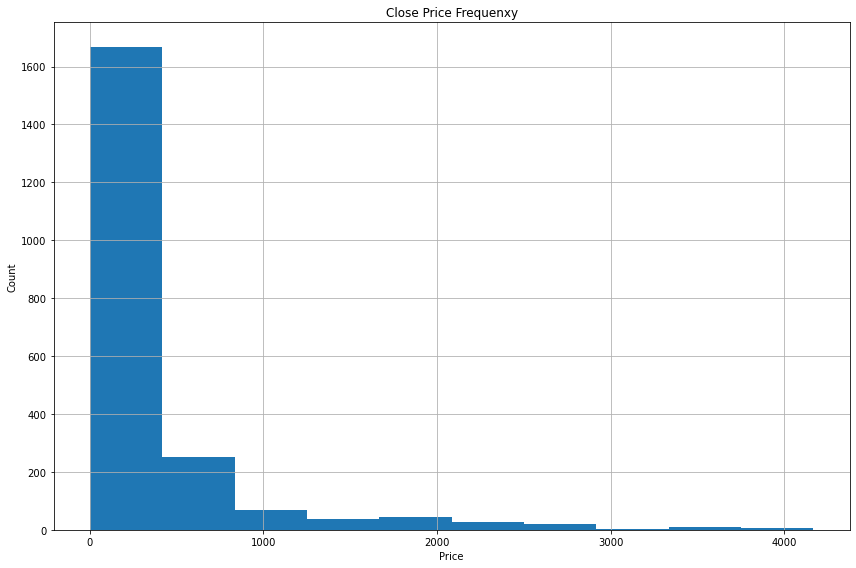

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
df.hist(column=['Close'], ax=ax)
ax.set_title('Close Price Frequenxy')
ax.set_xlabel('Price')
ax.set_ylabel('Count')
plt.tight_layout()
# plt.savefig('Histograms')


Above is a histogram of the frequency of occurences of price value. Their distribution exemplifies the volatility of the asset. The large majority of prices fall between 0 and 1000, however there are low-frequency instances of prices that are 2, 3, and 4 times the max value of that range. This shows that the price spiked and fell, never maintaining a high value for very long at all. 

### Clean up the Graphs

The original time series was very hard to interpret because the volume column has very large numbers that messed with the scale of the graph. In order to remedy this, we will plot the price data and the volume data seperately, and we will resample the Volume data in order

In [ ]:
# Plot the time series
fig = go.Figure()
col = ['Open', 'High', 'Low', 'Close']

# Add traces
for c in col:
    fig.add_trace(go.Scatter(x=df.index, y=df[c], mode='lines', name=f'{c}'))
fig.update_layout(
title='Price Data',
xaxis_title='Date',
yaxis_title='Price',
legend_title='Legend')
fig.show()
display(px.line(data_frame=df, x=df.index, y=df['Volume'], title='Volume Data'))

Target Variable

The trends of each series for each price related column (our target) are pretty much identical, so we can choose one of the features as a target variable and stick with that.
<br>

I will be using the "Close" price for Ethereum, which is the price of the asset at the close of normal trading hours at 4pm. 

### Resample Data (Week, Month, Year)

In [ ]:
# Create resampled DataFrame for more smooth visualization
quarterly_df = pd.DataFrame(df.resample('Q').mean())

# Plot the time series
fig = go.Figure()
col = ['Open', 'High', 'Low', 'Close']
# Add traces
for c in col:
    fig.add_trace(go.Scatter(x=quarterly_df.index, y=quarterly_df[c], mode='lines', name=f'{c}'))
fig.update_layout(
title='Price Data',
xaxis_title='Date',
yaxis_title='Price',
legend_title='Legend')
fig.show()
display(px.line(data_frame=quarterly_df, x=quarterly_df.index, y=quarterly_df['Volume'], title='Volume Data'))

### Autocorrelation Plots

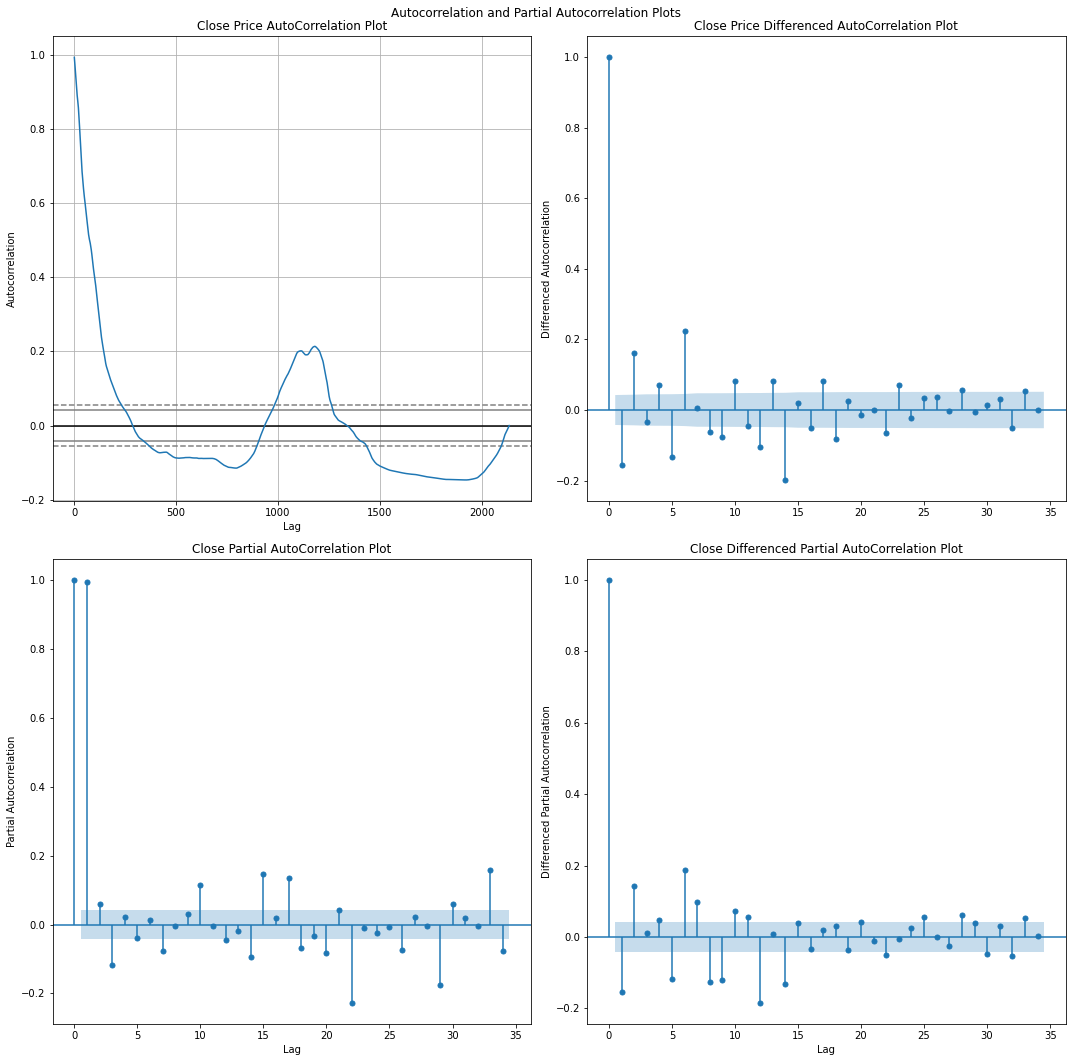

In [ ]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

autocorrelation_plot(df['Close'].dropna(), ax=ax[0][0])
ax[0][0].set_title('Close Price AutoCorrelation Plot')

plot_acf(df['Close'].diff().dropna(), ax=ax[0][1])
ax[0][1].set_title('Close Price Differenced AutoCorrelation Plot')
ax[0][1].set_ylabel('Differenced Autocorrelation')

plot_pacf(df['Close'].dropna(), ax=ax[1][0])
ax[1][0].set_title('Close Partial AutoCorrelation Plot')
ax[1][0].set_xlabel('Lag')
ax[1][0].set_ylabel('Partial Autocorrelation')

plot_pacf(df['Close'].diff().dropna(), ax=ax[1][1])
ax[1][1].set_title('Close Differenced Partial AutoCorrelation Plot')
ax[1][1].set_xlabel('Lag')
ax[1][1].set_ylabel('Differenced Partial Autocorrelation')

plt.suptitle('Autocorrelation and Partial Autocorrelation Plots')
plt.tight_layout()
plt.savefig('acf_plots')

### Test Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF Test for Non-differenced target variable
result = adfuller(df['Close'], autolag='AIC')
print('NON-DIFFERENCED TARGET VARIABLE')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

print(' ')
print(' ')

# ADF Test for Differenced target variable
result = adfuller(df['Close'].diff().dropna(), autolag='AIC')
print('DIFFERENCED TARGET VARIABLE')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


NON-DIFFERENCED TARGET VARIABLE
ADF Statistic: 1.0029061147236595
p-value: 0.9942965169904011
 
 
DIFFERENCED TARGET VARIABLE
ADF Statistic: -9.300900887869764
p-value: 1.1132363356594116e-15


- A first-order difference is enough to stationarize the data

### Rolling Averages

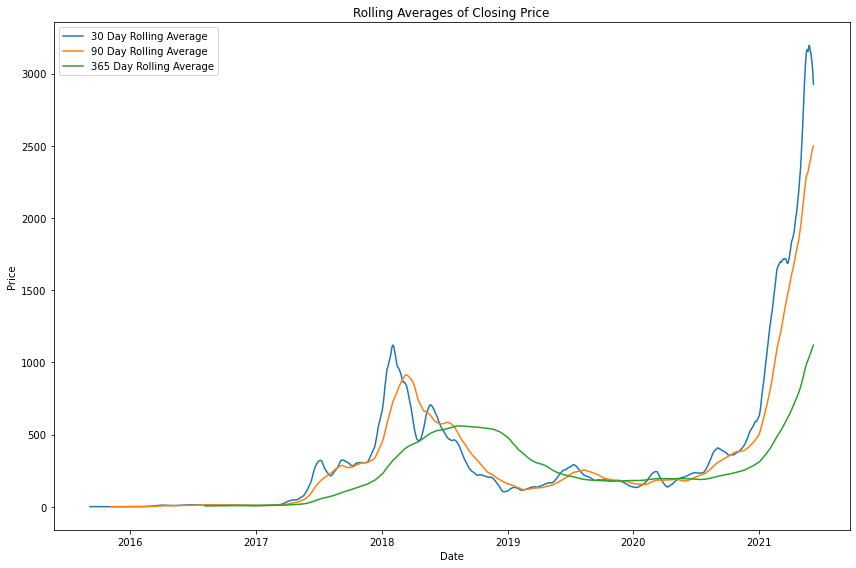

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
df_30d_rol = df['Close'].rolling(window = 30).mean()
df_90d_rol = df['Close'].rolling(window = 90).mean()
df_365d_rol = df['Close'].rolling(window = 365).mean()
ax.plot(df_30d_rol, label='30 Day Rolling Average')
ax.plot(df_90d_rol, label='90 Day Rolling Average')
ax.plot(df_365d_rol, label='365 Day Rolling Average')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Rolling Averages of Closing Price')
plt.legend()
plt.tight_layout()
plt.savefig('rolling_averages')

In [ ]:
# # Full compiled graph of 30-day, 90-day, and 365-day rolling averages

# fig = go.Figure()


# df_30d_rol = df['Close'].rolling(window = 30).mean()
# df_90d_rol = df['Close'].rolling(window = 90).mean()
# df_365d_rol = df['Close'].rolling(window = 365).mean()
# fig.add_trace(go.Scatter(x=df.index, y=df_30d_rol, mode='lines', name=f'30d Close'))
# fig.add_trace(go.Scatter(x=df.index, y=df_90d_rol, mode='lines', name=f'90d Close'))
# fig.add_trace(go.Scatter(x=df.index, y=df_365d_rol, mode='lines', name=f'365d Close'))

# fig.update_layout(
# title='Price Data',
# xaxis_title='Date',
# yaxis_title='Price',
# legend_title='Legend')
# fig.show()

The rolling averages calculated from three different windows (30, 90, 365) provide some more insight to the data. As the window increases in size, the rolling averages' values have very different values during the highly volatile periods of the price of Ethereum. This volatility resulted in each of these periods having wildly different minimum and maximum values, which results in rolling averages that also different by quite a lot. Unsurprisingly, the 30-day and 90-day rolling averages were the most closely related, especially during the first period of steep upwards trend. The prices did not reach magnitude differences during these windows that warranted such a drastic rolling average difference. However, at the end of our time period, the rolling averages end up differing in value by almost $500, which goes to show the extreme volatility that Ethereum experienced during this time period (the most recent months when Ethereum had a meteoric rise). In short summary, the 365-day moving average had the lowest average value because it generalized the most volatility, however its final value was very below the true price. The 30-day moving average had the highest value because it strongly accounted for the high volatility, and its final value was a little higher than the true price (the extreme upper values pulled the average upwards). The 90-day moving average was the closest to the true price, showing that it both accounted for and generalized the volatility the best of the three windows!

### Seasonality

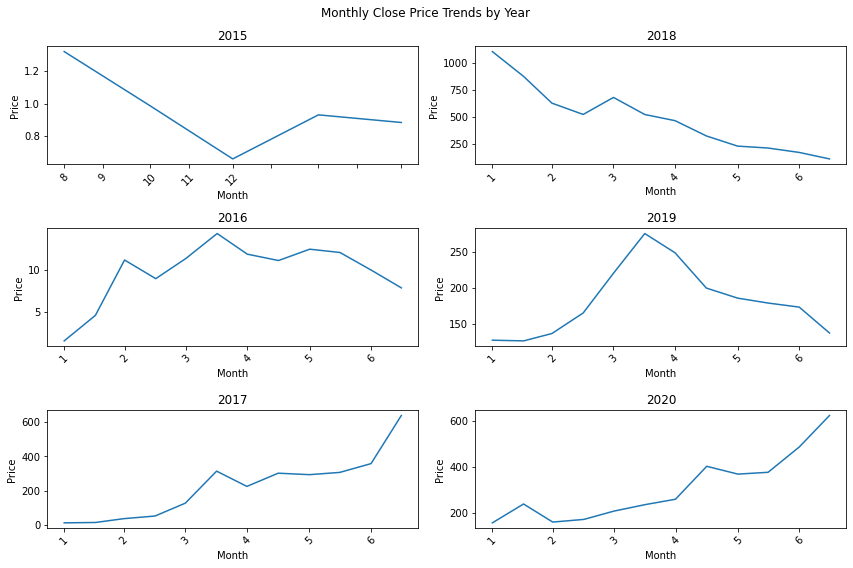

In [ ]:
# Investigate Monthly Seasonality per Year
monthly_df = pd.DataFrame(df.resample('MS').mean())
fig, ax = plt.subplots(3,2, figsize=(12, 8))

ax[0][0].plot(monthly_df['Close']['2015'])
ax[0][0].set_title('2015')
ax[0][0].set_xlabel('Month')
ax[0][0].set_ylabel('Price')
ax[0][0].set_xticklabels(labels=monthly_df['Close']['2015'].index.month,rotation=45)

ax[1][0].plot(monthly_df['Close']['2016'])
ax[1][0].set_title('2016')
ax[1][0].set_xlabel('Month')
ax[1][0].set_ylabel('Price')
ax[1][0].set_xticklabels(labels=monthly_df['Close']['2016'].index.month,rotation=45)

ax[2][0].plot(monthly_df['Close']['2017'])
ax[2][0].set_title('2017')
ax[2][0].set_xlabel('Month')
ax[2][0].set_ylabel('Price')
ax[2][0].set_xticklabels(labels=monthly_df['Close']['2017'].index.month,rotation=45)


ax[0][1].plot(monthly_df['Close']['2018'])
ax[0][1].set_title('2018')
ax[0][1].set_xlabel('Month')
ax[0][1].set_ylabel('Price')
ax[0][1].set_xticklabels(labels=monthly_df['Close']['2018'].index.month,rotation=45)


ax[1][1].plot(monthly_df['Close']['2019'])
ax[1][1].set_title('2019')
ax[1][1].set_xlabel('Month')
ax[1][1].set_ylabel('Price')
ax[1][1].set_xticklabels(labels=monthly_df['Close']['2019'].index.month,rotation=45)


ax[2][1].plot(monthly_df['Close']['2020'])
ax[2][1].set_title('2020')
ax[2][1].set_xlabel('Month')
ax[2][1].set_ylabel('Price')
ax[2][1].set_xticklabels(labels=monthly_df['Close']['2020'].index.month,rotation=45)

plt.suptitle('Monthly Close Price Trends by Year')
plt.tight_layout()
plt.savefig('monthly_price_trends')

There are no seasonal trends shown. Each year shows varying periods of time where the price and volume experienced both upwards and downwards trends. Since 

### Findings

Ethereum prices follow what is called a "cyclical trend", which means that it has trends however these trends so no specific pattern of repetition. To illustrate this, we can look at two of the graphs, which are both displayed above. 

From the year 2015 to the first quarter of 2017, the price of Ethereum remained quite stationary, with a very strong rise starting between March and April, which led to a strong upwards trend that lasted throughout the rest of the year of 2017, bring the price to a maximum value of 826.82 by the end of the year. This constituted a 10,106 percent price increase from the minimum price of 8.17 in the year of 2017, which is by all standards a very strong upwards trend. The volume of trades also followed this trend quite closely, matching the sentiment idea that as an asset shoots up in price, more people attempt to join in on the ride, and hence more trades are made. After the year 2017, the price of Ethereum immediately started a strong downwards trend beginning in January of 2018, and by the end of 2018 the price had settled to a minimum value of 84.30, roughly a 94% drop from its all time high at the very beginning of 2018. Volume for the rest of 2018 remained on average higher than the two years afterwards and the year before because at first people were participating in frequent trades due to the meteoric rise in price, and then people continued to sell their coins over the year as the price tanked. From 2019 to mid-2020, the price once again mostly resumed the stationary trend that it had exemplified from 2015 to about a quarter of the way through 2017, indicating that perhaps people lost interest in the Ethereum block-chain, doubted its potential, or simply moved on to different investments. There was a sharp rise in prise to a little over 250 during 2019, but it just as quickly fell back to close to the minimum value of that year, failing to breakout of its strong downwards trend. The volume from 2019 to mid-2020 would never drop to the levels seen before the coin's meteoric rise, most likely because such a note-worthy event put Ethereum on the map permanently. During 2019, there was a sharp rise and fall in volume that mirrored the trend of the quick rise and fall of price during that year. 2019-2021 would be the period of time when Ethereum would consistently reflect a yearly upwards trend. Volume was higher than its ever been, and the price rose to an unprecedented level of roughly 4000. During this upwards trend, there were several downwards trends that occured during certain months of the years. They seemed to be relatively random, with no predictability in their occurences, highlighting the unstationarity of the price of Ethereum, and also the idea that the price follows a "cyclical trend". There are very clear bull and bear markets, however the trickly part is timing these.  



# Modeling

## Scale the Data

We are going to want to scale the data because of the massive magnitude differences between values. This will most likely improve the accuracy of our forecast

In [14]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
scaled_data = pd.DataFrame(ss.fit_transform(df), columns=df.columns, index=df.index)

## Prophet

In [ ]:
### Create Prophet compatible DataFrame
data = pd.DataFrame(df['Close']).reset_index()
data = data.rename(columns={'Date':'ds', 'Close':'y'})

### Train-Test-Split the data
train = data[:1407]
test = data[1407:]

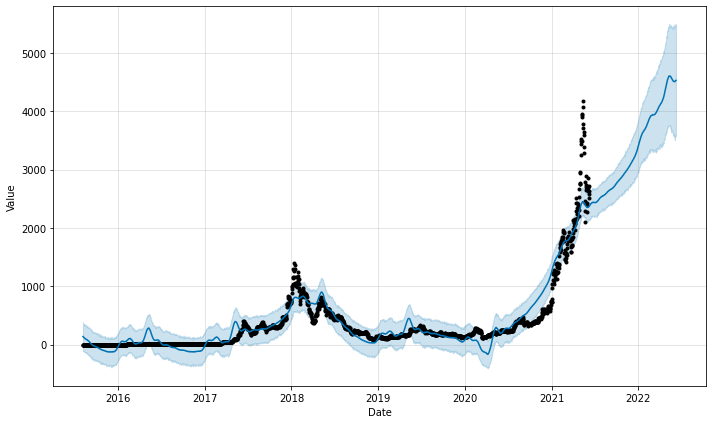

In [ ]:
from fbprophet import Prophet
m = Prophet(daily_seasonality=False)

### Predictions using all data
m.fit(data)
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)
m.plot(forecast, xlabel='Date', ylabel='Value');

In [ ]:
### Predictions using training data
m = Prophet(daily_seasonality=False)

m.fit(train)
future = m.make_future_dataframe(periods=len(test), freq='D')
forecast = m.predict(future)


### Predictions DataFrame
pred = pd.DataFrame(forecast.yhat_upper[-726:])
pred.index=forecast.ds[-726:]
pred

### Test data DataFrame
testplot = pd.DataFrame(test.y)
testplot.index=test.ds

### Plot Test vs Predictions
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(pred, label='Predictions', color='red')
ax.plot(testplot, label='True', color='green')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Ethereum Predicted Price vs True Price')
plt.tight_layout()

### Calculate RMSE
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(pred, testplot))
print(rmse)

KeyboardInterrupt: ignored

## Random-Walk

In [ ]:
## Walk
rwdata = pd.DataFrame(df['Close'], columns=['Close'])
rwdata['change'] = df['Close'].pct_change()
mean = rwdata['change'][1:].mean() 
sd = rwdata['change'][1:].std()

## Predict
model = {}
model['Prediction'] = [rwdata['Close'][0]]
for time in range(1, len(rwdata)):
    old = model['Prediction'][time -1] 
    new_price = old*(1+ mean) + old*sd*np.random.normal(0,1) 
    model['Prediction'].append(new_price)
    
## Plot
rwdf = pd.DataFrame(model, index=rwdata.index) 

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(rwdf, label='Predicted Values', color='Red')
ax.plot(rwdata['Close'], label='True Values', color='Blue')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Random Walk Predictions vs True Value')
plt.legend()
plt.tight_layout()

rmse = math.sqrt(mean_squared_error(rwdf, rwdata['Close']))
print(f'RMSE = {rmse}')

The model was run multiple times, in an attempt to aquire the best possible model for the problem. The best random-walk achieved had an RMSE of 323.097. Since the business strategy we are focusing on is day-trading, it is preferable to have tighter margins of error, because we are not holding for long periods of time and therefore a wrong guess affects our success more strongly.

## ARIMA Model

In [ ]:
### Train-Test-Split the Non-Scaled Data
y_train = df['Close'][:'2019-06-13']
y_test = df['Close']['2019-06-14':] 
x_train = df.index[:1407]
x_test = df.index[1407:]

###
y_train_scaled = scaled_data['Close'][:'2019-06-13']
y_test_scaled = scaled_data['Close']['2019-06-14':] 

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA

# Build a 1,1,1 ARIMA model
p, d, q = 1, 1, 1
model = ARIMA(y_train, order=(p, d, q))
model_fit = model.fit()


### Model Summary
print(model_fit.summary())


### Forecast
forecast, se, conf = model_fit.forecast(3, alpha=0.05)


### Convert to series so we can plot the data
forecast_series = pd.Series(forecast, index=y_test.index)


### Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(y_train, label='Training')
plt.plot(y_test, label='Actual')
plt.plot(forecast_series, label='Model Predictions')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('arima')

rmse = math.sqrt(mean_squared_error(forecast_series, y_test))
print(f' RMSE = {rmse}')

In [ ]:
# Calculate Residuals
residuals = pd.DataFrame(model_fit.resid)

# Plot residuals
fig, ax = plt.subplots(1,2, figsize=(18,10))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])

plt.tight_layout()

The ARIMA model performed poorly for the data provided. This can almost certainly be attributed to the exaggerated volatility of Ethereum prices. The period of time that ARIMA was trained on showed an interesting trend. The price remained low, then spiked to a value that was much higher than before, and just as quickly fell down to a very low value again and remained there for quite some time. In other words, it was relatively stationary, then had a steep upwards trend, a steep downwards trend, and then remained relatively stationary again. The two main determinants of ARIMA predicitons, past values and moving average, are very hard to predict upon because thei values vary by so much. In order to try and improve my model, I will be using the "pmdarima" package to try and optimize the hyperparamters of the ARIMA model.

The RMSE of the model was 915.88, a very poor metric, and significantly worse than our random-walk metric measurement.

## Auto-ARIMA

In [ ]:
import pmdarima as pm
model = pm.auto_arima(y_train, start_P=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, 
                      D=1, start_Q=0, max_D=5, max_Q=5, m=12, seasonal=True, error_action='warn',
                      trace=True, supress_warnings=True, stepwise=False)
model.summary()

In [ ]:
# make your forecasts
prediction = pd.DataFrame(model.predict(n_periods=726), index=y_test.index)
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y_test.shape[0])
plt.plot(y_train, c='green')
plt.plot(prediction, c='pink')
plt.show()

rmse = math.sqrt(mean_squared_error(prediction, y_test))
print(f'RMSE = {rmse}')

The AUTO-ARIMA model was ran and forecasted. It performed marginally better than the ARIMA model, with an RMSE of 915.55 rather than an RMSE of 915.88. This value is still significant worse than the metric calculated from our Random-Walk model. Since these metrics are so poor, we are going to move on to different model.

## Sarimax and One-Step-Ahead Model

In [15]:
### Train-Test-Split the Non-Scaled Data
y_train = df['Close'][:'2019-06-13']
y_test = df['Close']['2019-06-14':] 
x_train = df.index[:1407]
x_test = df.index[1407:]

###
y_train_scaled = scaled_data['Close'][:'2019-06-13']
y_test_scaled = scaled_data['Close']['2019-06-14':] 

### Grid Search

In [ ]:
# p = d = q = range(0, 5)
# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(df['Close'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
#             results = mod.fit()
#             print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
#         except: 
#             continue

### Model Predictions

In [ ]:
def sarima_and_osa(series, order, order_season, prediction_date):
    
    ### Train model
    model = sm.tsa.statespace.SARIMAX(series, order=order, order_season=order_season, trend='c')
    results = model.fit()
    print(results.summary().tables[1])
    
    ### RMSE for One-Step_Ahead Forecast
    forecast = results.get_prediction(start=(pd.to_datetime(prediction_date)), dynamic=False)
    
    ### RMSE and Plot
    
    mean_forecast = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    
    mse = ((mean_forecast - y_test) ** 2).mean()
    print(f'The Sarima RMSE for the One-Step-Ahead Forecast is {round(np.sqrt(mse), 2)}')
    
    ax = series.plot(label='Observed')
    mean_forecast.plot(ax=ax, label='One-step Ahead Model Predictions of Data', alpha=.7, figsize=(12, 8))
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    plt.xlim('2021-01-01', x_test[-1])
    plt.legend()
    plt.show()
#     plt.savefig('one_step_ahead')
    
    ### Root-Mean-Squared-Error of Dynamic Forecast
    pred_dynamic = results.get_prediction(start=pd.to_datetime(prediction_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    forecast_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((forecast_dynamic - y_test) ** 2).mean()
    print(f'The Sarima RMSE for the Dynamic Model Predictions is {round(np.sqrt(mse_dynamic), 2)}')
    
    ### Plot Dynamic Forecast
    ax = y_train.plot(label='Observed')
    forecast_dynamic.plot(label='Dynamic Model Predictions of Data', ax=ax, figsize=(12, 8))
    y_test.plot(label='True Values', ax=ax, figsize=(12,8))
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')

    plt.legend()
    plt.show()
#     plt.savefig('sarimax')
    return (results)

In [ ]:
series = df['Close']
sarima_and_osa(df['Close'],order=(1,2,3), order_season=(1, 1, 1, 12), prediction_date=x_test[0]);
# plt.savefig('bla')

The one-step ahead model performed very well, with an RMSE of 72.12, the lowest of all of the models so far. This model's predictions were very close to that of the actual values, and utilization of this model for day trading would be highly effective. However, that is where this model's utilization ability stops. If there is an intention to use the model to predict farther in the future (30 days, 90 days, etc), a different model might be more effective.

The original SARIMAX model performed very poorly, with an RMSE value very similar to that of the ARIMA models. A gridsearch was done on the model to try and optimize the hyperparameters, and a much better model was constructed as a result.


The SARIMAX model performed much better than the ARIMA model, with an RMSE of 658.58. 

## Deep Learning

### LSTM

#### LSTM With Manual Timeseries Sampling

In [8]:
da = df['Close']

In [9]:
# Specify data and create two empty lists that will carry our historical data, and then our target data
data = da
hist = []
target = []

# Specify the length of each time-step, and have the history list contain all of the data with 
# 90-day time steps that shift by one day each group
## Every group of values in X has one corresponding predicted value of y
length = 90
for i in range(len(data)-length):
    x = data[i : i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)
    
# Convert the data to an array
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

# Scale the data to avoid magnitude difference noise
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_hist = scaler.fit_transform(hist)
scaled_target = scaler.fit_transform(target)

# Reshape data so it can be used in a Neural Network
scaled_hist = scaled_hist.reshape((len(scaled_hist), length, 1))

# Create the train and test sets
X_train = scaled_hist[:1800,:,:]
X_test = scaled_hist[1800:,:,:]
y_train = scaled_target[:1800,:]
y_test = scaled_target[1800:,:]

In [10]:
# Create the model!

from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(units=32, return_sequences=True,
                  input_shape=(90,1), dropout=0.2))
model.add(LSTM(units=32, return_sequences=True,
                  dropout=0.2))
model.add(LSTM(units=32, dropout=0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['MeanSquaredError'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 32)            4352      
_________________________________________________________________
lstm_1 (LSTM)                (None, 90, 32)            8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32)

In [ ]:
loss = history.history['loss']
epochs = range(1, 31)
plt.figure(figsize=(12,8))
plt.plot(epochs, loss)
plt.legend(['Training Loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show();

In [ ]:
pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, label='Real')
plt.plot(pred, label='Prediction')
plt.title('Ethereum Price Prediction')
plt.legend()
plt.show()

What this code did was use 90-day batches to predict one day in the future. It used the training set of the first 1800 days. The last 333 days were used as the test set! 

#### LSTM with TimeseriesGenerator (Best results of the two)

In [25]:
data = np.asarray(df['Close']).reshape(-1,1)

In [26]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# split into train and test sets
train_size = int(len(data) * 0.6)
test_size = len(data) - train_size

train = data[0:train_size,:]
test = data[train_size:len(data),:]

In [28]:
# Use TimeseriesGenerator to create the samples
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 90

train_data = TimeseriesGenerator(train, train,
    length=n_input,
    batch_size=128)

test_data = TimeseriesGenerator(test, test,
    length=n_input,
    batch_size=1)

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

In [27]:
np.asarray(train_data).shape

(10, 2)

In [14]:
from numpy.random import seed

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 256)               265216    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 257       
Total params: 265,473
Trainable params: 265,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
10/10 [==============================] - 2s 10ms/step - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 2/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0013 - mean_squared_error: 0.0013   
Epoch 3/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 4/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 5/200
10/10 [==============================] - 0s 9ms/step - 

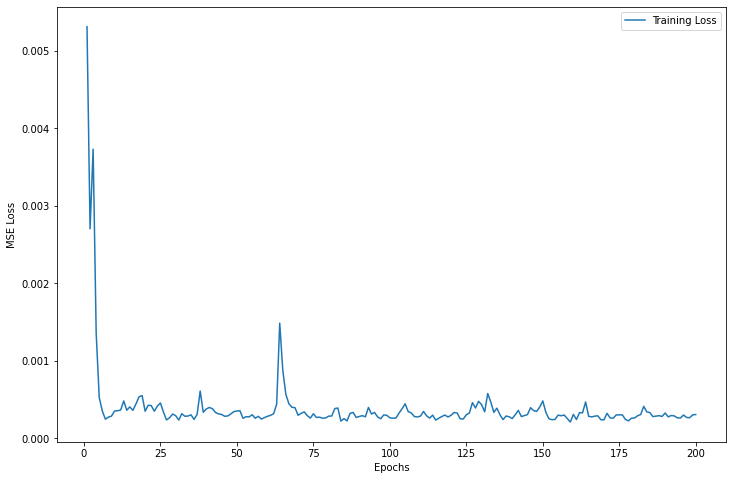

(1189, 1)
(764, 1)


Close         Pred
Date                            
2019-05-07   169.80   180.758957
2019-05-08   170.95   181.614777
2019-05-09   170.29   182.613312
2019-05-10   173.14   183.464752
2019-05-11   194.30   184.681198
...             ...          ...
2021-06-04  2688.19  2249.659424
2021-06-05  2630.58  2246.537354
2021-06-06  2715.09  2242.037598
2021-06-07  2590.26  2251.350586
2021-06-08  2517.44  2243.852539

[764 rows x 2 columns]

RMSE = 197.76725269163376


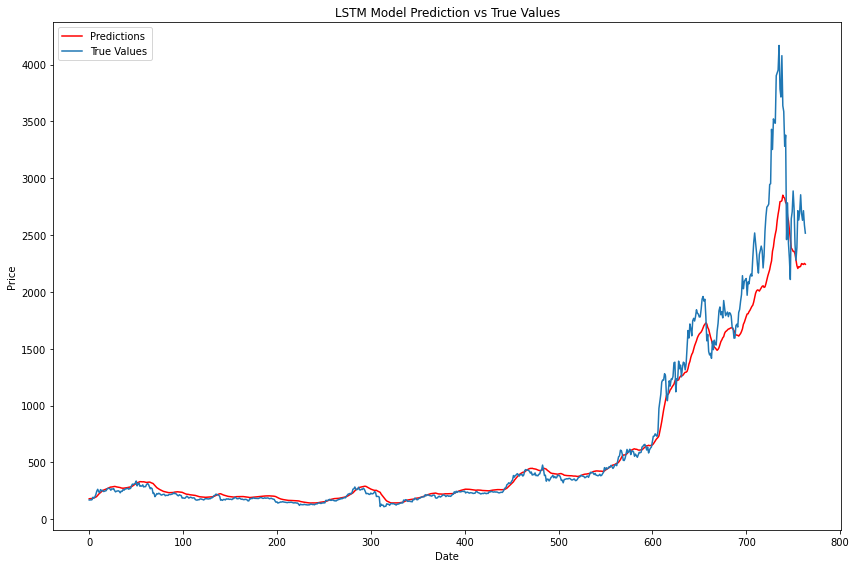

In [36]:
# Model 1

model1 = Sequential()
model1.add(LSTM(256, return_sequences=False,
                  input_shape=(10,2), dropout=0.2))
# model1.add(Dropout(0.2))
model1.add(Dense(units=1))

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['MeanSquaredError'])

# Summarize the model
model1.summary()
history = model1.fit_generator(train_data, epochs=200)

# Plot loss by epoch
loss = history.history['loss']
epochs = range(1, 201)
plt.figure(figsize=(12,8))
plt.plot(epochs, loss)
plt.legend(['Training Loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show();

# Predict
train_pred = model1.predict_generator(train_data)
test_pred = model1.predict_generator(test_data)

# Inverse the transformation we did earlier so we have the true values of the predictions
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

# Helper function
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

# Get the y values
train_output = get_y_from_generator(train_data)
test_output = get_y_from_generator(test_data)

# Reverse transform those
train_output = scaler.inverse_transform(train_output)
test_output = scaler.inverse_transform(test_output)


# Plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(test_pred, label='Predictions', color='red')
ax.plot(test_output, label="True Values")
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
ax.set_title('LSTM Model Prediction vs True Values')
plt.tight_layout()
plt.savefig('lstm')

# Show predictions and RMSE
rmse_df1 = pd.DataFrame(df['Close'], index=df.index[1369:])
rmse_df1['Pred'] = test_pred
display(rmse_df1)
rmse = math.sqrt(mean_squared_error(rmse_df1['Close'], rmse_df1['Pred']))
print(f'RMSE = {rmse}')

In [1]:
# Model 2

model2 = Sequential()
model2.add(LSTM(256, return_sequences=False,
                  input_shape=(90,1), dropout=0.2))
model2.add(Dropout(0.2))
model2.add(Dense(units=1))

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['MeanSquaredError'])

# Summarize the model
model2.summary()
history = model2.fit_generator(train_data, epochs=100)

# Plot loss by epoch
loss = history.history['loss']
epochs = range(1, 101)
plt.figure(figsize=(12,8))
plt.plot(epochs, loss)
plt.legend(['Training Loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show();

# Predict
train_pred = model2.predict_generator(train_data)
test_pred = model2.predict_generator(test_data)

# Inverse the transformation we did earlier so we have the true values of the predictions
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

# Helper function
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

# Get the y values
train_output = get_y_from_generator(train_data)
test_output = get_y_from_generator(test_data)

# Reverse transform those
train_output = scaler.inverse_transform(train_output)
test_output = scaler.inverse_transform(test_output)


# Plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(test_pred, label='Predictions', color='red')
ax.plot(test_output, label="True Values")
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
ax.set_title('LSTM Model Prediction vs True Values')
plt.tight_layout()
plt.savefig('lstm')

# Show predictions and RMSE
rmse_df2 = pd.DataFrame(df['Close'], index=df.index[1369:])
rmse_df2['Pred'] = test_pred
display(rmse_df2)
rmse = math.sqrt(mean_squared_error(rmse_df2['Close'], rmse_df2['Pred']))
print(f'RMSE = {rmse}')

NameError: name 'Sequential' is not defined

In [24]:
# Model 3 (Greater complexity, dropout is specified inside the LSTM model parameters)
# Read this https://stackoverflow.com/questions/50720670/using-dropout-with-keras-and-lstm-gru-cell to understand the difference
## between a dropout LAYER and the dropout PARAMETER in the LSTM function

# Create the model!
model3 = Sequential()
model3.add(LSTM(units=100, return_sequences=True,
                  input_shape=(90,1), dropout=0.2))
model3.add(LSTM(units=100, return_sequences=True,
                  dropout=0.2))
model3.add(LSTM(units=100, dropout=0.2))
model3.add(Dense(units=1))

# Compile the model
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['MeanSquaredError'])

# Summarize the model
model3.summary()

# Run the model
history = model3.fit_generator(train_data, epochs=30)

# Predict the data using the model!
train_pred = model3.predict_generator(train_data)
test_pred = model3.predict_generator(test_data)

# Inverse the transformation we did earlier so we have the true values of the predictions
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

# Plot loss per epoch
loss = history.history['loss']
epochs = range(1, 31)
plt.figure(figsize=(12,8))
plt.plot(epochs, loss)
plt.legend(['Training Loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show();

# Helper function
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

# Get the y values
train_output = get_y_from_generator(train_data)
test_output = get_y_from_generator(test_data)

# Reverse transform those
train_output = scaler.inverse_transform(train_output)
test_output = scaler.inverse_transform(test_output)


# Plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(test_pred, label='Predictions', color='red')
ax.plot(test_output, label="True Values")
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
ax.set_title('LSTM Model Prediction vs True Values')
plt.tight_layout()
plt.savefig('lstm')

# Show predictions and RMSE
rmse_df3 = pd.DataFrame(df['Close'], index=df.index[1369:])
rmse_df3['Pred'] = test_pred
display(rmse_df3)
rmse = math.sqrt(mean_squared_error(rmse_df3['Close'], rmse_df3['Pred']))
print(f'RMSE = {rmse}')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 19, 100)           41200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 19, 100)           80400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 202,101
Trainable params: 202,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30


InvalidArgumentError:    Specified a list with shape [?,2] from a tensor with shape [37,1]
	 [[{{node TensorArrayUnstack/TensorListFromTensor}}]]
	 [[sequential_4/lstm_6/PartitionedCall]] [Op:__inference_train_function_19402]

Function call stack:
train_function -> train_function -> train_function


Originally, 30 epochs were used for the model. The "Loss vs Epoch" graph suggested that the loss could further be reduced, as it still had a clear downward trend rather than evening out in order to show the values of the loss converged.

For the next model, we will use the same complexity model, however we will increase the number of epochs to 100.

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 90, 128)           66560     
_________________________________________________________________
lstm_49 (LSTM)               (None, 90, 128)           131584    
_________________________________________________________________
lstm_50 (LSTM)               (None, 32)                20608     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 218,785
Trainable params: 218,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 4s 19ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 2/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/100
10/10 [======

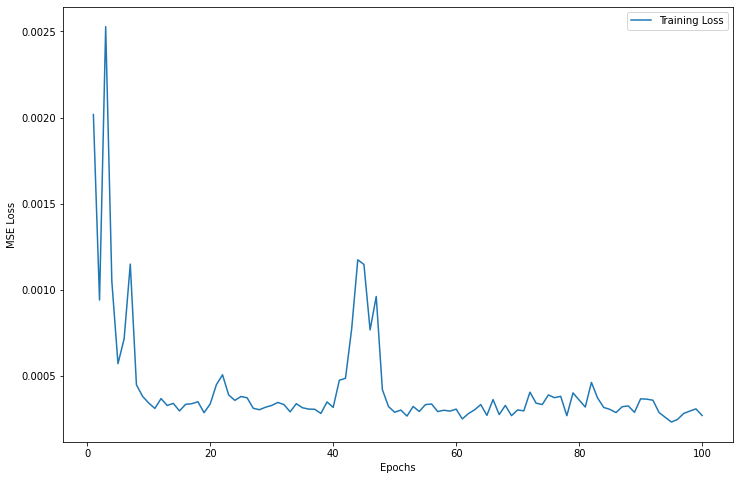

(1189, 1)
(764, 1)


Close         Pred
Date                            
2019-05-07   169.80   163.705597
2019-05-08   170.95   164.464767
2019-05-09   170.29   165.251221
2019-05-10   173.14   165.936066
2019-05-11   194.30   166.706696
...             ...          ...
2021-06-04  2688.19  2089.664795
2021-06-05  2630.58  2099.045410
2021-06-06  2715.09  2096.481934
2021-06-07  2590.26  2094.433350
2021-06-08  2517.44  2085.713867

[764 rows x 2 columns]

RMSE = 247.43393521950873


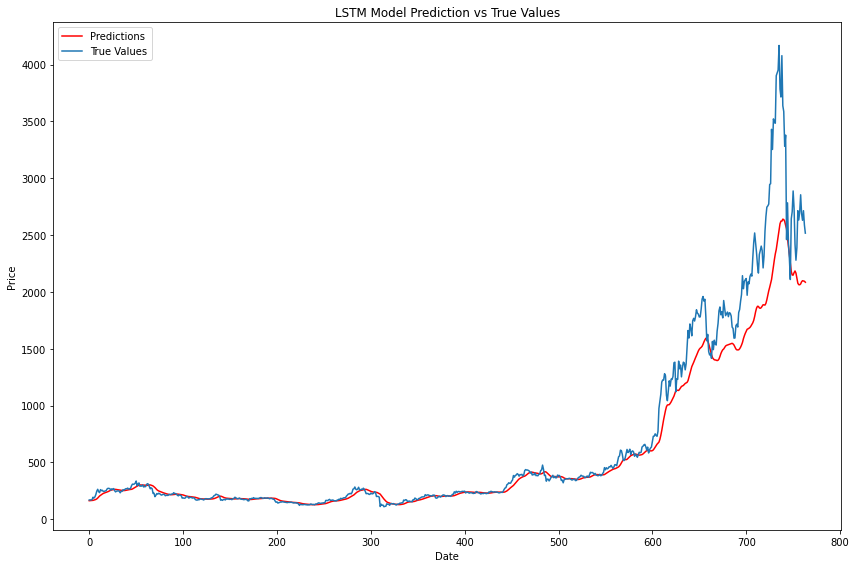

In [65]:
# Model 4 (same model, more epochs)

# Create the model!
model4 = Sequential()
model4.add(LSTM(units=128, return_sequences=True,
                  input_shape=(90,1), dropout=0.2))
model4.add(LSTM(units=128, return_sequences=True,
                  dropout=0.2))
model4.add(LSTM(units=32, dropout=0.2))
model4.add(Dense(units=1))

# Compile the model
model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['MeanSquaredError'])

# Summarize the model
model4.summary()

# Fit the model
history = model4.fit_generator(train_data, epochs=100)

# Predict the data using the model!
train_pred = model4.predict_generator(train_data)
test_pred = model4.predict_generator(test_data)

# Inverse the transformation we did earlier so we have the true values of the predictions
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

# Plot loss per epoch
loss = history.history['loss']
epochs = range(1, 101)
plt.figure(figsize=(12,8))
plt.plot(epochs, loss)
plt.legend(['Training Loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show();

# Helper function
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

# Get the y values
train_output = get_y_from_generator(train_data)
test_output = get_y_from_generator(test_data)

# Reverse transform those
train_output = scaler.inverse_transform(train_output)
test_output = scaler.inverse_transform(test_output)


# Plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(test_pred, label='Predictions', color='red')
ax.plot(test_output, label="True Values")
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
ax.set_title('LSTM Model Prediction vs True Values')
plt.tight_layout()
plt.savefig('lstm')

# Show predictions and RMSE
rmse_df4 = pd.DataFrame(df['Close'], index=df.index[1369:])
rmse_df4['Pred'] = test_pred
display(rmse_df4)
rmse = math.sqrt(mean_squared_error(rmse_df4['Close'], rmse_df4['Pred']))
print(f'RMSE = {rmse}')# Predict the data using the model!

The model with 100 epochs performed significantly better than our model with only 30 epochs. The loss per epoch was GREATLY reduced over the subsequent 70 extra epochs that the model was run through. 

Now, let's run the model again, except this time we will add dropout layers between each LSTM layer.

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 19, 1024)          4206592   
_________________________________________________________________
dropout_11 (Dropout)         (None, 19, 1024)          0         
_________________________________________________________________
lstm_46 (LSTM)               (None, 19, 1024)          8392704   
_________________________________________________________________
dropout_12 (Dropout)         (None, 19, 1024)          0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 1024)              8392704   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)               

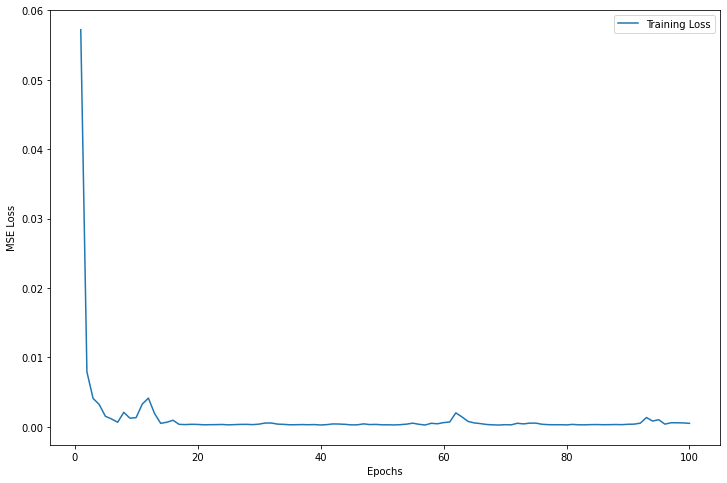

(1189, 1)
(764, 1)


Close         Pred
Date                            
2019-05-07   169.80   237.041687
2019-05-08   170.95   238.547897
2019-05-09   170.29   240.021545
2019-05-10   173.14   241.214935
2019-05-11   194.30   242.623917
...             ...          ...
2021-06-04  2688.19  2846.021484
2021-06-05  2630.58  2857.681641
2021-06-06  2715.09  2853.877686
2021-06-07  2590.26  2859.284912
2021-06-08  2517.44  2853.440430

[764 rows x 2 columns]

RMSE = 169.86406735913118


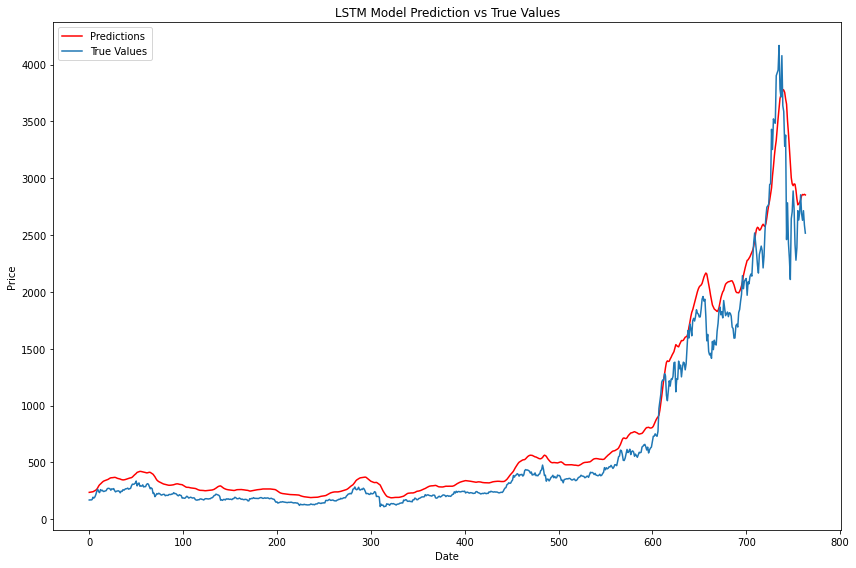

In [42]:
# Model 5

# Create the model!
from keras.layers import Dropout
model5 = Sequential()
model5.add(LSTM(1024, return_sequences=True,
                  input_shape=(19,2), dropout=0.2))
model5.add(Dropout(0.2))
model5.add(LSTM(1024, return_sequences=True, dropout=0.2))
model5.add(Dropout(0.2))
model5.add(LSTM(1024, return_sequences=False, dropout=0.2))
model5.add(Dropout(0.2))
model5.add(Dense(units=1))

# Compile the model
model5.compile(optimizer='adam', loss='mean_squared_error', metrics=['MeanSquaredError'])

# Summarize the model
model5.summary()

# Fit the model
history = model5.fit_generator(train_data, epochs=100)

# Plot loss by epoch
loss = history.history['loss']
epochs = range(1, 101)
plt.figure(figsize=(12,8))
plt.plot(epochs, loss)
plt.legend(['Training Loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show();

# Predict
train_pred = model5.predict_generator(train_data)
test_pred = model5.predict_generator(test_data)

# Inverse the transformation we did earlier so we have the true values of the predictions
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

# Helper function
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

# Get the y values
train_output = get_y_from_generator(train_data)
test_output = get_y_from_generator(test_data)

# Reverse transform those
train_output = scaler.inverse_transform(train_output)
test_output = scaler.inverse_transform(test_output)


# Plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(test_pred, label='Predictions', color='red')
ax.plot(test_output, label="True Values")
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
ax.set_title('LSTM Model Prediction vs True Values')
plt.tight_layout()
plt.savefig('lstm')

# Show predictions and RMSE
rmse_df5 = pd.DataFrame(df['Close'], index=df.index[1369:])
rmse_df5['Pred'] = test_pred
display(rmse_df5)
rmse = math.sqrt(mean_squared_error(rmse_df5['Close'], rmse_df5['Pred']))
print(f'RMSE = {rmse}')

In [64]:
display(rmse_df5)
investment = 1000
for index, pred in enumerate(rmse_df5['Pred']):
  if index==763:
    break
  elif rmse_df5['Pred'][int(index+1)] > pred:
    investment = investment + 250
  elif rmse_df5['Pred'][index+1] < pred:
    investment = investment * 0.97

investment


Close         Pred
Date                            
2019-05-07   169.80   237.041687
2019-05-08   170.95   238.547897
2019-05-09   170.29   240.021545
2019-05-10   173.14   241.214935
2019-05-11   194.30   242.623917
...             ...          ...
2021-06-04  2688.19  2846.021484
2021-06-05  2630.58  2857.681641
2021-06-06  2715.09  2853.877686
2021-06-07  2590.26  2859.284912
2021-06-08  2517.44  2853.440430

[764 rows x 2 columns]

16861.630426920015

The model with less complexity (1 LSTM layer) performed better than our model with more complexity.

## Profit Calculations

Now that the models have been constructed, let's calculate the net revnue made from three different trading strategies:

1. LSTM strategy
  - This strategy consists of the trader buying $250 worth of Ethereum on the day before a predicted rise in price, and then selling 3% worth of their total Ethereum on the day before a predicted fall.

2. Moving Average Strategy

3. Buy and Hold Strategy

Text(0, 0.5, 'Price in $')

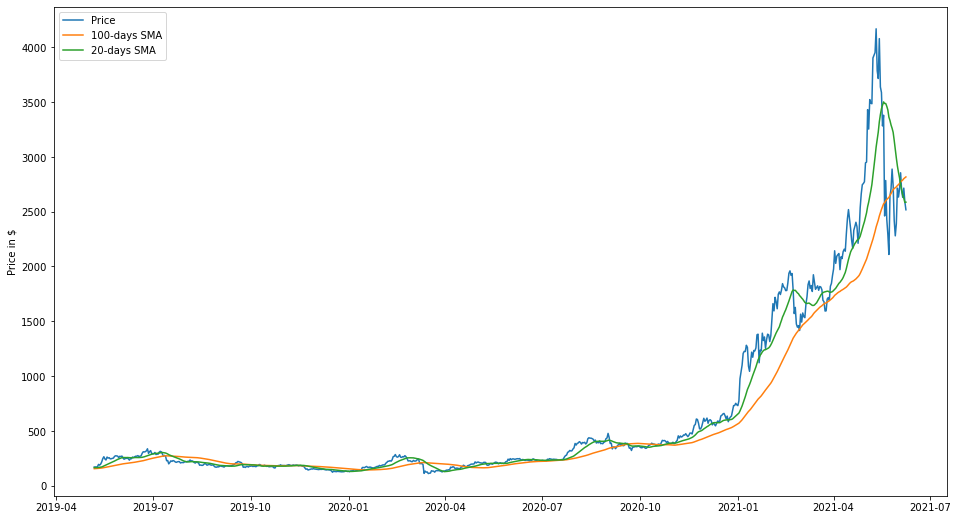

In [53]:
datap = pd.DataFrame(df['Close'], index=df.index)

# Calculating the short-window simple moving average
short_rolling = datap.rolling(window=20).mean()


# Calculating the long-window simple moving average
long_rolling = datap.rolling(window=60).mean()

start_date = '2019-05-07'
end_date = '2021-06-08'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(datap.loc[start_date:end_date, :].index, datap.loc[start_date:end_date, 'Close'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Close'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')

Text(0, 0.5, 'Price in $')

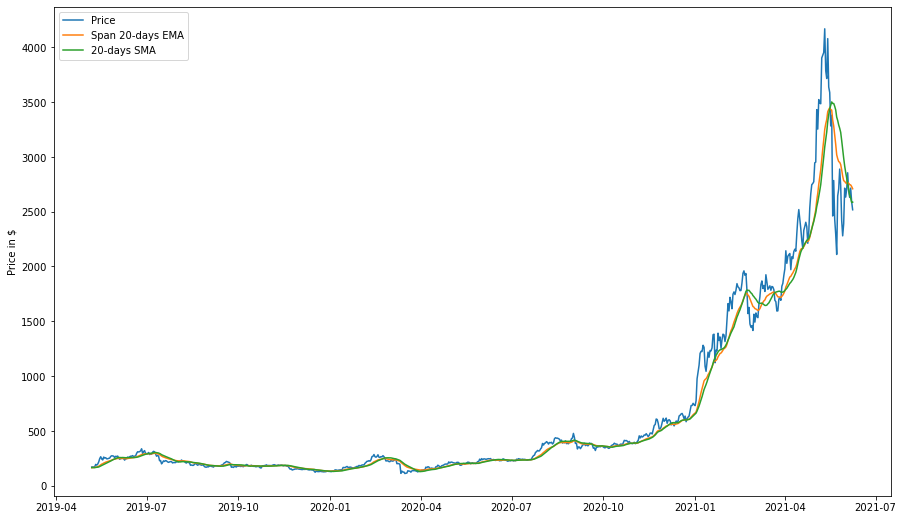

In [54]:
# Using Pandas to calculate a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
ema_short = datap.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(datap.loc[start_date:end_date, :].index, datap.loc[start_date:end_date, 'Close'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')

In [55]:
# Taking the difference between the prices and the EMA timeseries
trading_positions_raw = datap - ema_short
trading_positions_raw.tail()

Close
Date                  
2021-06-04  -71.086189
2021-06-05 -116.439409
2021-06-06  -28.888513
2021-06-07 -139.078655
2021-06-08 -191.717831

In [66]:
# Taking the sign of the difference to determine whether the price or the EMA is greater and then multiplying by 1/3
trading_positions = trading_positions_raw.apply(np.sign)
trading_positions.tail()

Close
Date             
2021-06-04   -1.0
2021-06-05   -1.0
2021-06-06   -1.0
2021-06-07   -1.0
2021-06-08   -1.0

In [57]:
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)